# Fashion Recognizer with CNN using tensorflow

The **first work** in collab notebook is to change the **runtime type to TPU or GPU** for **faster** competion of the project.
You can do it in following steps :

        Click on Runtime --> Change Runtime Type --> Change it to GPU or TPU 

As we are using a **kaggle dataset** to train and perdict we have to use a *docker* to connect kaggle with google collab.

So , we have to upload the API token taken from kaggle ( maybe named as kaggle.json) on the google collab notebook.
and then we have to repeat this 4 lines of code and then we can take the whole data into the collab.

* This lines are used for -
            1. Intsalling the docker.
            2. Connecting it with kaggle directory.
            3. Connecting the unique json for singular accessibility.
            4. Securing access on the notebook.

In [ ]:
!pip install -q kaggle

!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

As we have linked the kaggle directory we can copy and paste any dataset's API command in the command lines. ( makes sure to write a '!' before pasting the command)

Now the data will be downloaded from kaggle to collab without getting a bypass.

In here we have taken the ***FASHION_MNIST dataset***. 

The kaggle link is shared below [*fashion_MNIST*](https://www.kaggle.com/zalando-research/fashionmnist)

In [ ]:
!kaggle datasets download -d zalando-research/fashionmnist

 90% 62.0M/68.8M [00:00<00:00, 80.3MB/s]
100% 68.8M/68.8M [00:00<00:00, 140MB/s] 


Now the file has been downloaded. But it is in a *.zip* file . So we have to extract the actual *.csv* files for training and prediction.

In [ ]:
from zipfile import ZipFile
zf = ZipFile('/content/fashionmnist.zip', 'r')
zf.extractall('/content')
zf.close()

Now the *.csv* files are produced in the notebook. So, we are going to start the main project.

The total deep learning or machhine learning project can be done in following steps :

         1. Importing required libraries.
         2. Reading the data and primary visualization
         3. Preprocessing
         4. Creating X and y
         5. Model Generation
         6. Training / Fitting model with data
         7. Model evaluation
         8. Creating prediction data
         9. Accuracy checking 
                           

## Libraries

In [ ]:
# main libraries
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

# supporting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

2.3.0


In [ ]:
# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

## Reading the data and primary visualization

In [ ]:
train=pd.read_csv('/content/fashion-mnist_train.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(60000, 785)

In [ ]:
test=pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.shape

(10000, 785)

## Preprocessing

As we have taken the train and test data in dataframe we have to change them into numpy ndarray for fitting in tensorflow framework.

The data is not shaped properly to feed through the CNN layers. So we also have to reshape the data.

Before that we have to split the X and Y of the datas.

In [ ]:
X_train=train.drop('label',1)
y_train=train['label']

In [ ]:
X_train=X_train.to_numpy()

In [ ]:
X_train=X_train.reshape(60000,28,28,1)

In [ ]:
X_test=test.drop('label',1)
y_test=test['label']

In [ ]:
X_test=X_test.to_numpy()
X_test=X_test.reshape(10000,28,28,1)

In [ ]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

**Just for visualization :** we can see the first image and and check it's original label.
(As the data is now in 4-d form we have to reshape it for visualization.

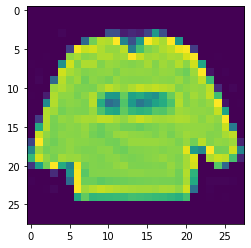

In [ ]:
plt.imshow(X_train[0].reshape(28,28))

In [ ]:
labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
labels[y_train[0]]

'Pullover'

We have created this array for better understanding .

You can use the word **decoder** of it.

As we preprocessed the data we have to normalize the values of the train and test for better prediction.

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

## Model generation

As we are making a CNN model for image classification so, we are using **2D ConvNet**

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))  # as in firts layer we have to feed the input shape.
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))           # dropout reduces the number of functional neurons.

model.add(Flatten())                   # after convnet layers we have to flatten the model to create actual prediction.
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))          # In this step we have used a softmax function to predict classes.

As we have created our model we can see the summary of it.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

We are compiling our model with *adam* optimizer and as this is a multiclass classification we are using the *sparse categorical cross entropy* as loss function.

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Now we have achieved to the most interesting part of the whole project.

We are storing the whole prediction in **hist** for model evaluation.

In [ ]:
hist=model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_test,y_test),verbose=1)   
# validation data can indicate overfitting or underfitting of the model.

Epoch 1/10
469/469 [==============================] - 142s 303ms/step - loss: 0.5272 - accuracy: 0.8138 - val_loss: 0.3123 - val_accuracy: 0.8883
Epoch 2/10
469/469 [==============================] - 143s 304ms/step - loss: 0.3414 - accuracy: 0.8781 - val_loss: 0.2697 - val_accuracy: 0.9041
Epoch 3/10
469/469 [==============================] - 141s 301ms/step - loss: 0.2956 - accuracy: 0.8941 - val_loss: 0.2594 - val_accuracy: 0.9029
Epoch 4/10
469/469 [==============================] - 141s 302ms/step - loss: 0.2640 - accuracy: 0.9044 - val_loss: 0.2473 - val_accuracy: 0.9087
Epoch 5/10
469/469 [==============================] - 141s 300ms/step - loss: 0.2385 - accuracy: 0.9123 - val_loss: 0.2131 - val_accuracy: 0.9220
Epoch 6/10
469/469 [==============================] - 140s 299ms/step - loss: 0.2158 - accuracy: 0.9209 - val_loss: 0.2109 - val_accuracy: 0.9235
Epoch 7/10
469/469 [==============================] - 141s 301ms/step - loss: 0.2028 - accuracy: 0.9259 - val_loss: 0.2010 -

So, the model fitting took almost 30 minutes. and after that we can see the we have reached a train accuracy of 94% and validation accuracy of 93%.



## Model Evaluation

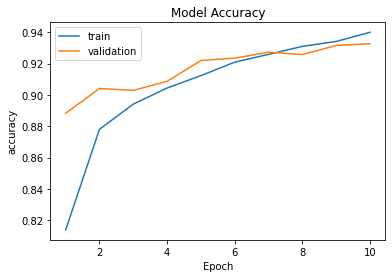

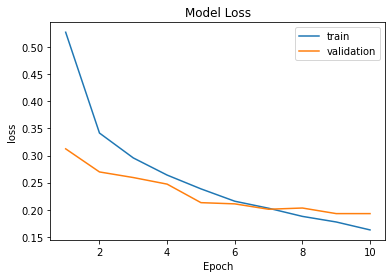

In [ ]:
plt.title('Model Accuracy')
plt.plot(range(1,11),hist.history['accuracy'])
plt.plot(range(1,11),hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model Loss')
plt.plot(range(1,11),hist.history['loss'])
plt.plot(range(1,11),hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

After visualizaing the accuracy and loss digram of both train and validation data we can see the model is slightly overfitted. and it is visible that the best accuracy for training and validation data is on **9th epoch**.

## Creating prediction data

In [ ]:
y_pr=model.predict(X_test)

In [ ]:
y_pr

array([[9.9977547e-01, 2.5815431e-12, 1.7205022e-06, ..., 4.2980668e-14,
        5.0200118e-08, 6.5532940e-14],
       [1.7893445e-09, 1.0000000e+00, 3.1099258e-13, ..., 3.8797608e-16,
        4.0209541e-12, 2.1193405e-14],
       [1.7534774e-03, 1.3341461e-08, 9.3151933e-01, ..., 1.3057934e-12,
        1.7746178e-08, 8.3406046e-11],
       ...,
       [2.3950603e-13, 6.3477000e-20, 6.5199493e-15, ..., 2.8005364e-17,
        1.0000000e+00, 4.0165115e-18],
       [8.7719229e-05, 4.6541565e-08, 1.3363811e-07, ..., 2.4130484e-08,
        9.9983335e-01, 2.4048734e-07],
       [2.1659629e-04, 9.9868649e-01, 7.2577272e-06, ..., 3.9604404e-09,
        2.6294085e-05, 1.6061444e-08]], dtype=float32)

as we can see the prediction of each image is sequence of values. So wee need to use argmax for getting the actual prediction.

In [ ]:
y_pred=[]
for i in range(len(y_pr)):
  y_pred.append(np.argmax(y_pr[i]))

So, now after getting the prediction we can check if it is really giving accurate predictions or not.

prediction of the image :  T-shirt/top
actual image :


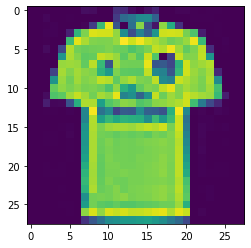

prediction of the image :  Trouser
actual image :


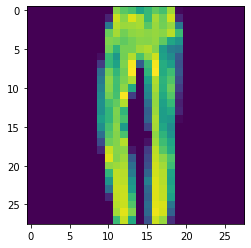

prediction of the image :  Pullover
actual image :


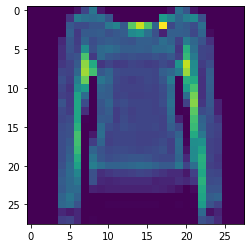

prediction of the image :  Bag
actual image :


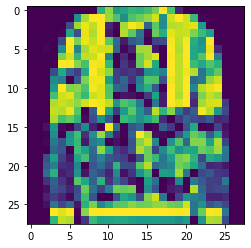

prediction of the image :  Dress
actual image :


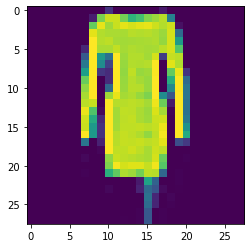

In [ ]:
for i in range(5):
  print('prediction of the image : ',labels[y_pred[i]])
  print('actual image :')
  plt.imshow(X_test[i].reshape(28,28))
  plt.show()

So, the predictions are quite good. So, the model is quite effective to the dataset.

## Accuracy checking

In [ ]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[885,   0,  18,  13,   0,   0,  81,   0,   3,   0],
       [  1, 990,   1,   6,   0,   0,   2,   0,   0,   0],
       [ 15,   0, 907,  11,  33,   0,  33,   0,   1,   0],
       [  8,   3,   4, 944,  17,   0,  24,   0,   0,   0],
       [  0,   0,  47,  20, 887,   0,  46,   0,   0,   0],
       [  0,   0,   0,   0,   0, 986,   0,   9,   1,   4],
       [ 90,   1,  44,  20,  37,   0, 805,   0,   3,   0],
       [  0,   0,   0,   0,   0,   5,   0, 964,   0,  31],
       [  2,   2,   3,   0,   1,   2,   5,   1, 984,   0],
       [  0,   0,   0,   0,   0,   2,   0,  23,   0, 975]])

(<Figure size 648x648 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f46e8d43ac8>)

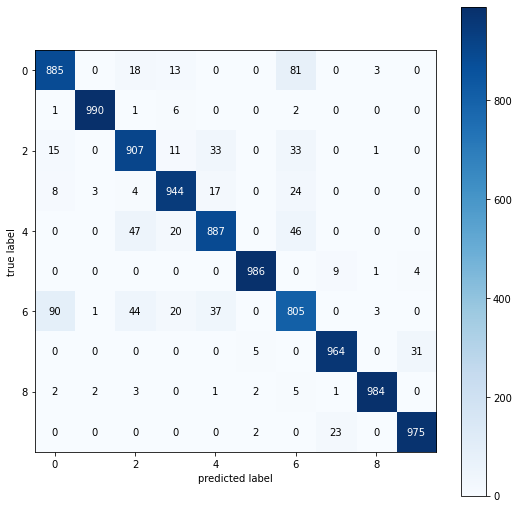

In [ ]:
plot_confusion_matrix(mat,figsize=(9,9),colorbar=True)

After plotting the confusion matrixes we can see that the model is well tined for image classification of those fashion types.Moreover *Tshirt/top* quite resembles with *shirt* what should be.

### Hurrah ! We've completed a whole image classification project using CNN model with tensorflow framework :)

At last but not the least you can visit my other works on [github](https://github.com/sagnik1511?tab=repositories) , [Kaggle](https://www.kaggle.com/sagnik1511)

***THANK YOU***

# THE END